<div style="background-color:lightblue; padding:20px; text-align:center; font-weight: bold;">
    <h1>Description of columns 📞:</h1>
</div>


* customerID: Unique customer identifier.

* gender: Customer's gender .

* SeniorCitizen: Indicates senior citizen status .

* Partner: Indicates if customer has a partner .

* Dependents: Indicates if customer has dependents .

* tenure: Number of months with the company.

* PhoneService: Indicates phone service .

* MultipleLines: Indicates multiple lines .

* InternetService: Type of internet service .

* OnlineSecurity: Online security service .

* OnlineBackup: Online backup service .

* DeviceProtection: Device protection service .

* TechSupport: Tech support service .

* StreamingTV: Streaming TV service .

* StreamingMovies: Streaming movies service .

* Contract: Contract type .

* PaperlessBilling: Paperless billing .

* PaymentMethod: Payment method .

* MonthlyCharges: Monthly charges.

* TotalCharges: Total charges.

* Churn: Indicates if customer churned.


<div style="background-color:lightblue; padding:20px; text-align:center; font-weight: bold;">
    <h1>Import some important libaraies :</h1>
</div>


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [26]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<div style="background-color:lightblue; padding:20px; text-align:center; font-weight: bold;">
    <h1>Remove warnings:</h1>
</div>


In [29]:
import warnings
warnings.simplefilter("ignore")

<div style="background-color:lightblue; padding:20px; text-align:center; font-weight: bold;">
    <h1>Display all columns and rows in the output :</h1>
</div>


In [30]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)


<div style="background-color:lightblue; padding:20px; text-align:center; font-weight: bold;">
    <h1>Load our data :</h1>
</div>


In [31]:
import pandas as pd

df = pd.read_csv(r"C:\Users\wwwsa\Downloads\SpeakX\WA_Fn-UseC_-Telco-Customer-Churn.csv")


<div style="background-color:lightblue; padding:20px; text-align:center; font-weight: bold;">
    <h1>Let's have imformation about the dataset:</h1>
</div>


In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# i will drop this column because it isn't useful
df.drop(columns=['customerID'], inplace=True)


In [34]:
#show number of rows and columns
df.shape

(7043, 20)

In [35]:
#show datatype and count non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* After i see datatypes of features,there are some columns need to modefy their type 

In [36]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' to handle spaces and non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [37]:
# Columns suitable for conversion to categorical
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Convert each column to categorical
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [39]:
#show if there are full duplicates 
df.duplicated().sum()

22

* there are duplicates i will drop them 

In [40]:
# Drop full duplicates
df.drop_duplicates(inplace=True)


In [41]:
nans = df.isna().sum().sort_values(ascending=False)
pct = 100 * nans / df.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_nans', 'percentage_of_nans']
nan_stats


,num_of_nans,percentage_of_nans
TotalCharges,11,0.156673
gender,0,0.000000
SeniorCitizen,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


* TotalCharges column has 11 nans , it is a small number so i will drop them

In [42]:
df.dropna(subset=['TotalCharges'], inplace=True)


In [43]:
# summary statistics od data 
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


In [44]:
# info about categorical variables
df.describe(include="category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3535,5869,3617,4911,6330,3363,3090,3489,3079,3086,3464,2801,2773,3853,4158,2359,5153


<div style="background-color:lightblue; padding:20px; text-align:center; font-weight: bold;">
    <h1>EDA☎️:</h1>
</div>


In [68]:
# Define custom colors
light_yellow_color = '#FFFFE0'
light_coral_color = '#F08080'
light_salmon_color = '#FFA07A'
light_sea_green_color = '#20B2AA'

# Create a color palette for pie charts
palette = [light_yellow_color, light_coral_color, light_salmon_color, light_sea_green_color]



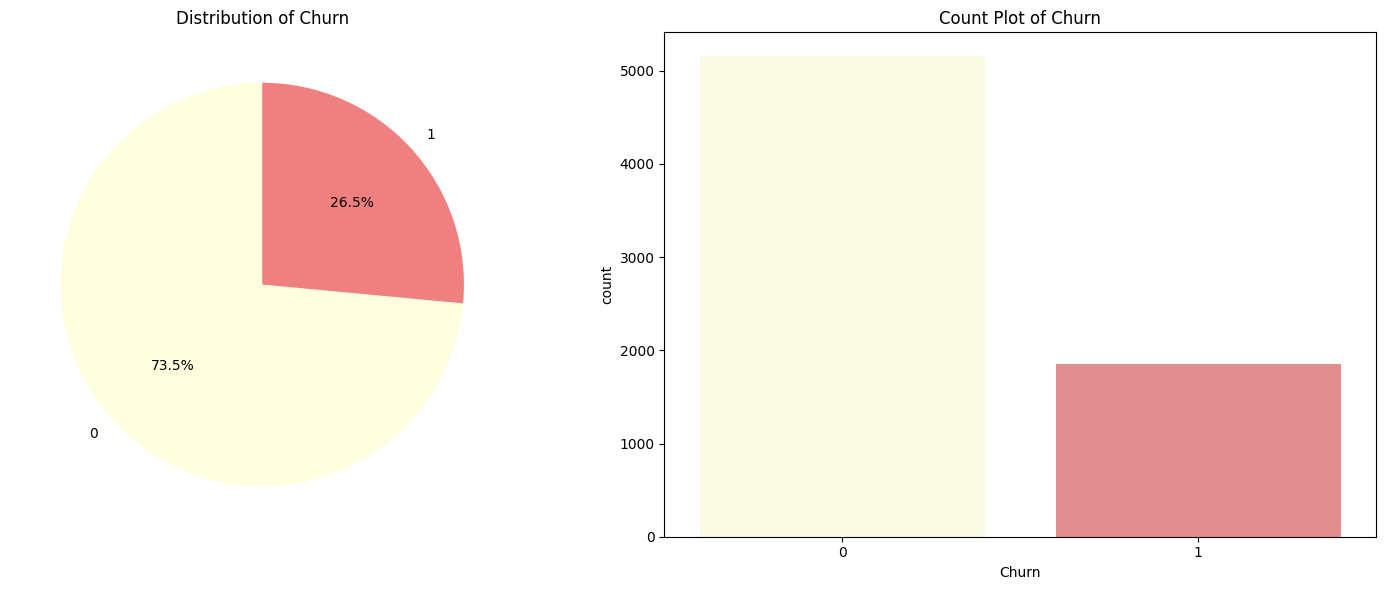

In [77]:
# Define custom colors
light_yellow_color = '#FFFFE0'
light_coral_color = '#F08080'
light_salmon_color = '#FFA07A'
light_sea_green_color = '#20B2AA'

# Create a color palette for pie charts
palette = [light_yellow_color, light_coral_color]

# Distribution of Churn
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Assume df is your DataFrame
status_counts = df['Churn'].value_counts()

# Pie chart
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
axes[0].set_title('Distribution of Churn')

# Count plot
sns.countplot(x='Churn', data=df, palette=palette, ax=axes[1])
axes[1].set_title('Count Plot of Churn')

plt.tight_layout()
plt.show()


* Based on the visualization of churn distribution, we observe that the percentage of customers who churned is approximately 26.5%, while the percentage of customers who did not churn is approximately 73.5%.

* i have imbalanced data so i will deal with it


In [70]:
# devide categorical columns in listist to ease plot them
customer_info = ["gender", "SeniorCitizen", "Partner", "Dependents"]
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
            "StreamingMovies"]
billing_info = ["Contract", "PaperlessBilling", "PaymentMethod"]

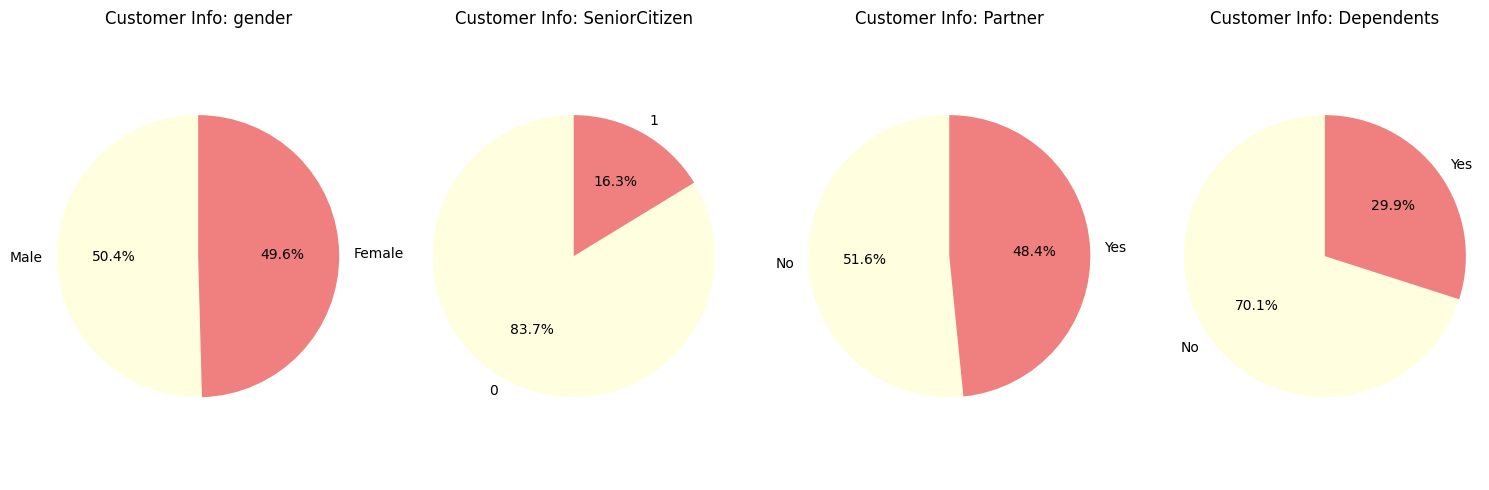

In [75]:
# Plot customer info columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(customer_info, 1):
    plt.subplot(1, 4, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
    plt.title(f'Customer Info: {col}')
    plt.axis('equal')  
plt.tight_layout()
plt.show()

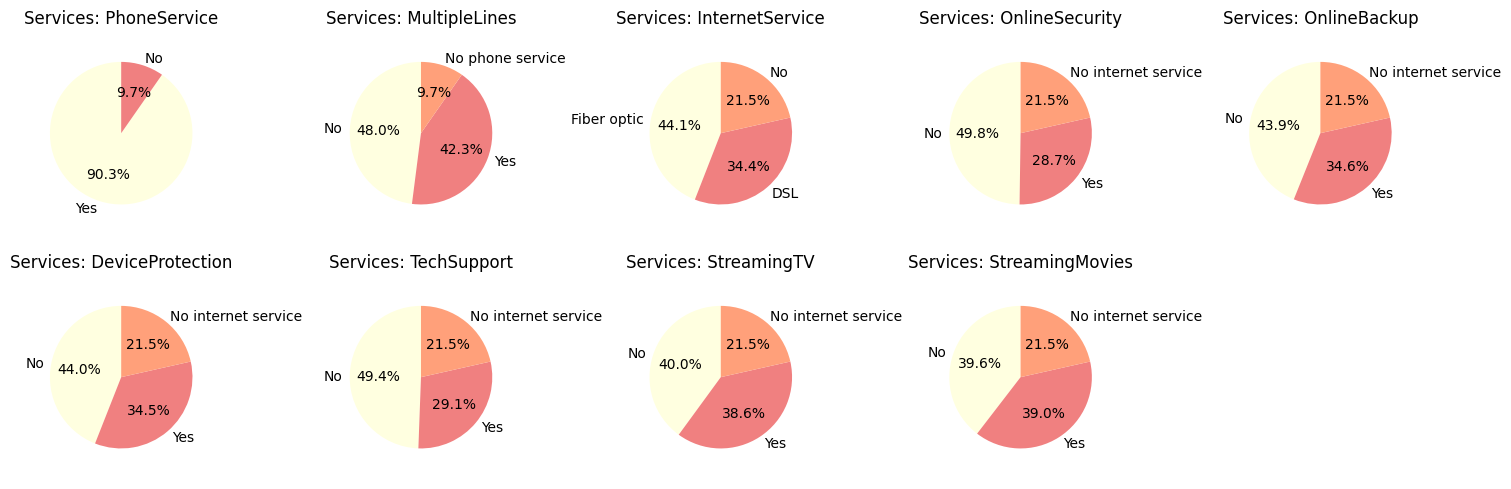

In [71]:
# Plot services columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(services, 1):
    plt.subplot(2, 5, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
    plt.title(f'Services: {col}')
    plt.axis('equal') 
plt.tight_layout()
plt.show()

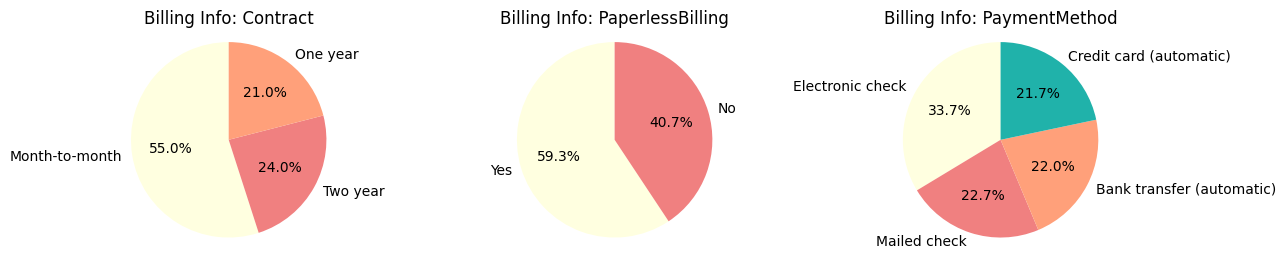

In [72]:
# Plot billing info columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(billing_info, 1):
    plt.subplot(2, 4, i)
    if col in ['MonthlyCharges', 'TotalCharges', 'tenure']:
        sns.histplot(df[col], kde=True, color=light_blue_color)
        plt.title(f'Billing Info: {col}')
    else:
        counts = df[col].value_counts(normalize=True)
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
        plt.title(f'Billing Info: {col}')
        plt.axis('equal')  
plt.tight_layout()
plt.show()

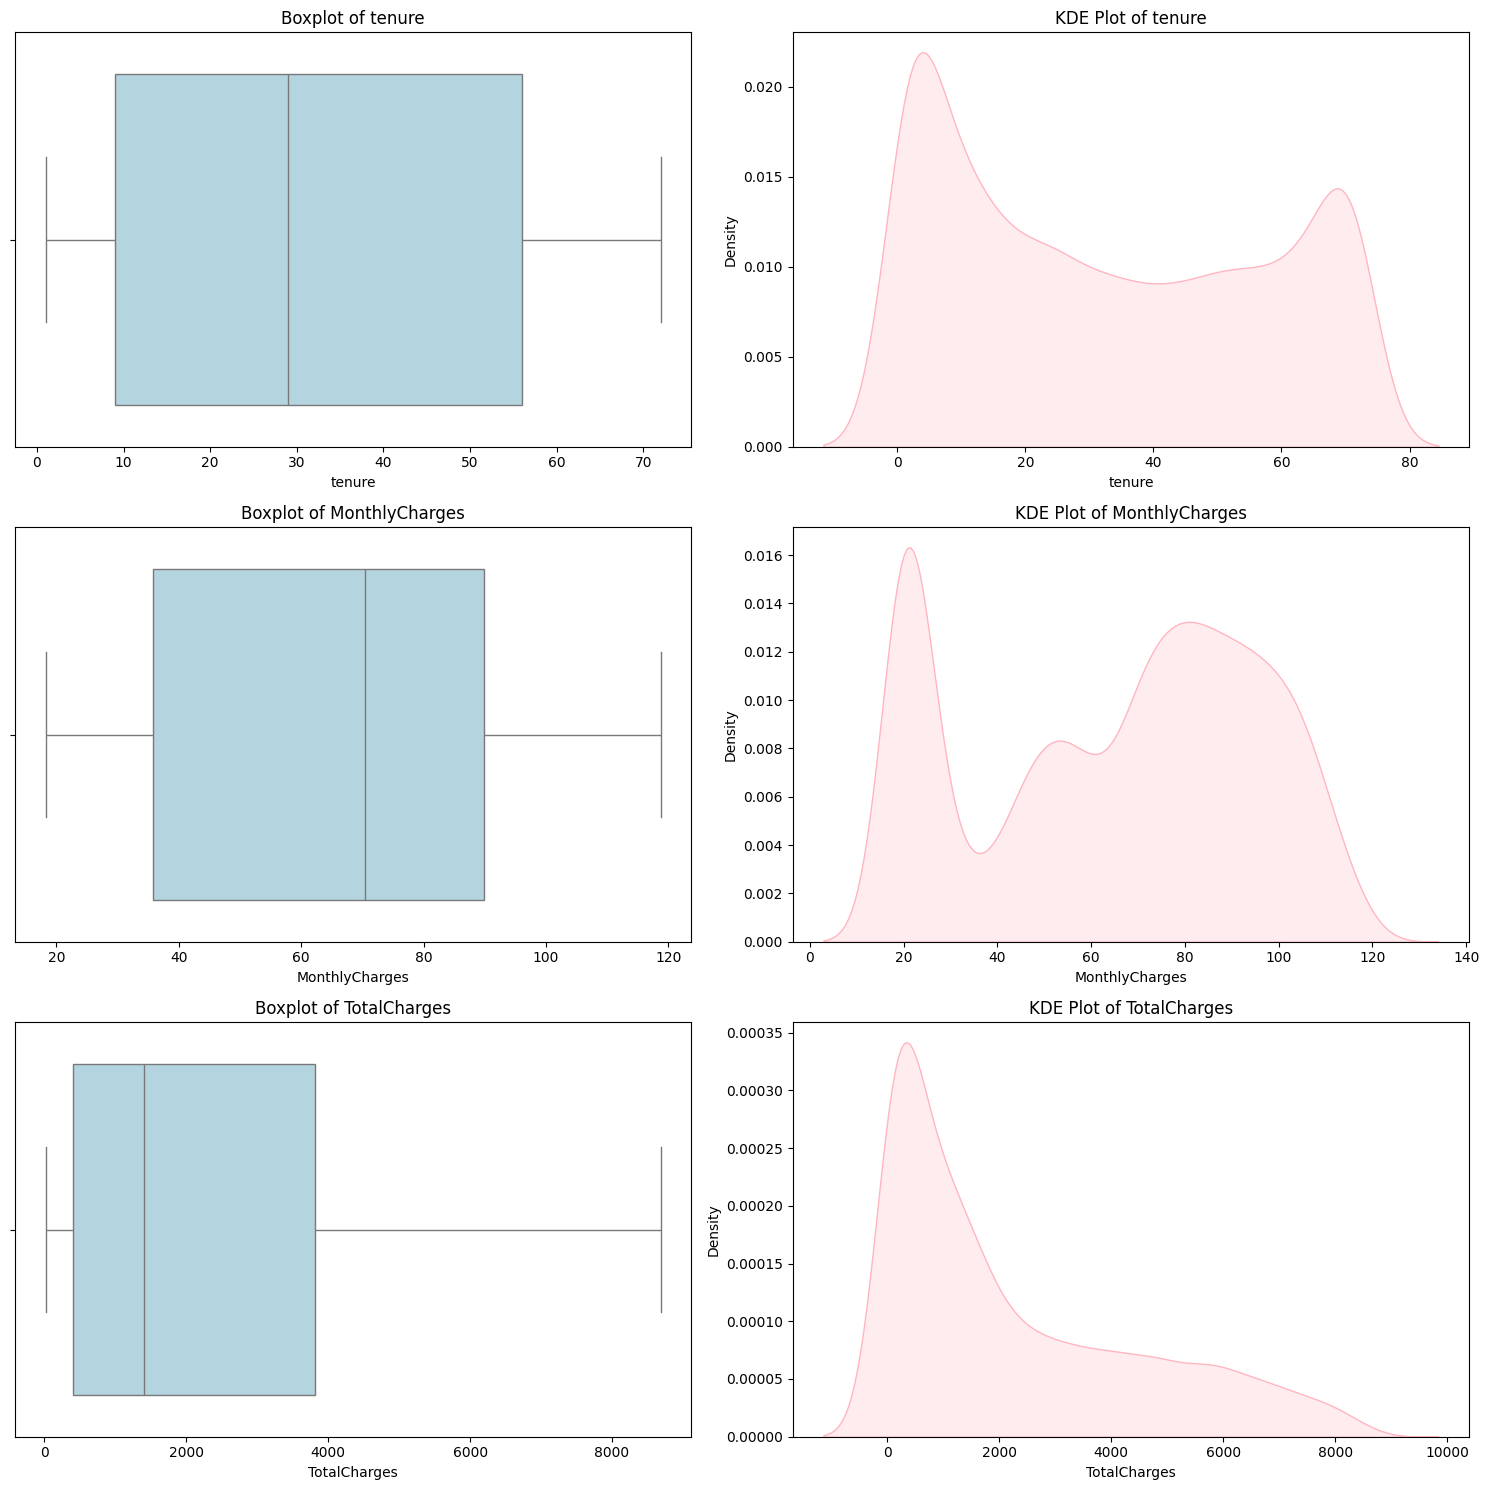

In [73]:
# Define numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

num_rows = len(numeric_cols)
num_cols = 2 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)
for i, column in enumerate(numeric_cols):
    # Box plot
    sns.boxplot(x=df[column], ax=axes[i, 0], color=light_blue_color)
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel(column)
    # KDE plot
    sns.kdeplot(data=df[column], ax=axes[i, 1], color=light_pink_color, fill=True)
    axes[i, 1].set_title(f'KDE Plot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

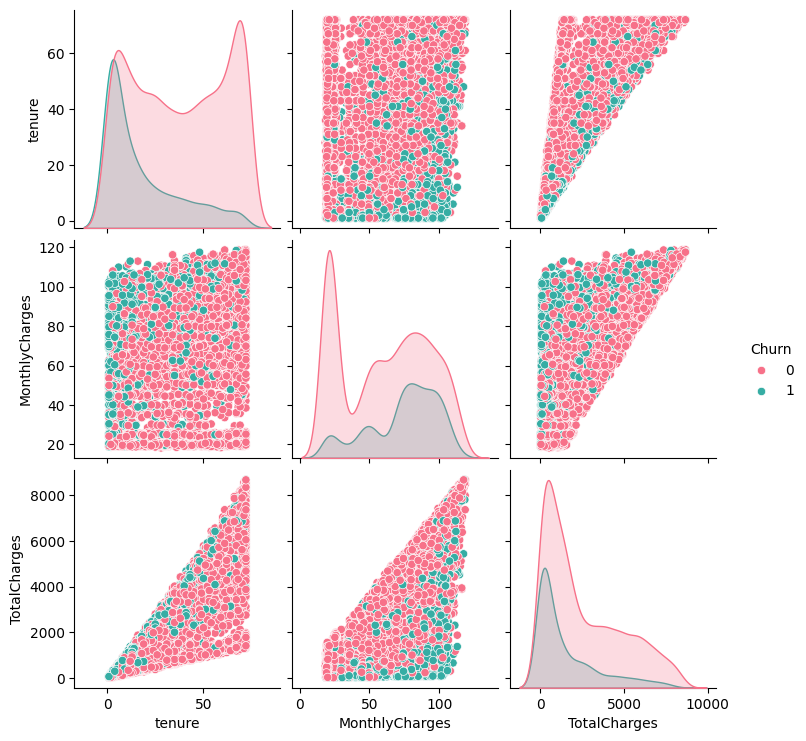

In [74]:
sns.pairplot(df, hue='Churn', palette='husl')

plt.show()


<div style="background-color:lightblue; padding:20px; text-align:center; font-weight: bold;">
    <h1>preprocessing:</h1>
</div>

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [54]:
# Replace values in the 'Churn' column
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})


In [55]:
# Define numeric and categorical features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

In [56]:
# Create preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()) 
])

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

# Combine preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

<div style="background-color:lightblue; padding:20px; text-align:center; font-weight: bold;">
    <h1>Modeling:</h1>
</div>

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score

In [58]:
# Define classifiers/models
classifiers = [
    ('logreg', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('gbc', GradientBoostingClassifier())
]

In [59]:
# Feature selection and Voting Classifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')


In [60]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']  


In [61]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Pipeline with SMOTE
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE()),
    ('voting_clf', voting_clf)
])


In [63]:
param_grid = {
    'voting_clf__logreg__C': [0.1, 1.0, 10],
    'voting_clf__rf__n_estimators': [50, 100, 200],
    'voting_clf__gbc__learning_rate': [0.01, 0.1, 0.2]
}


In [64]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='i...
                                       ('smote', SMOTE()),
                                       ('voting_clf',
                                        VotingClassifier(estimators=[('logreg',
                                                                      LogisticRegression(max_iter=1000)),
                                                                     ('rf',
                                                                      RandomForestClassifier()),
                                                                     ('gbc',
                                                                      GradientBoostingClassifier())],
                                                         voting='soft'))]),
             param_grid={'voting_clf__gbc__learning_rate': [0.01, 0.1, 0.2],
                         'voting_clf__logreg__C': [0.1, 1.0, 10],
                         'voting_clf__rf__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [65]:
# Best parameters and estimator
print("Best parameters found: ", grid_search.best_params_)
best_estimator = grid_search.best_estimator_

Best parameters found:  {'voting_clf__gbc__learning_rate': 0.1, 'voting_clf__logreg__C': 0.1, 'voting_clf__rf__n_estimators': 200}


In [66]:

# Predictions
y_pred = best_estimator.predict(X_test)


In [67]:
# Evaluation
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

recall: 0.71
F1 Score: 0.60
precision: 0.52
Accuracy: 0.79
